In [2]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

datasetNo = 0

# define storage arrays and reshape to hold all three galaxy type data
redshifts = np.array(range(3*24), dtype=float)
redshifts.shape = (3, 24)
kco_s = np.array(range(3*24), dtype=float)
kco_s.shape = (3, 24)

# Separate each star particle in each data set with '---'
for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    #Where to find the files
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    #Start counting from 0
    count = 0

    #Reshape angular momentum - DO WE NEED THIS???
    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:


    
        #Example file name (EXPLAIN FILE NAME STRUCTURE)
        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract coordinate, velocity and mass data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
         # Calculate the resultant angular momentum vectors j
        # j contains the AM vectors for each particle per redshift era
        j = np.cross(ds_c, ds_v)
        specAngMom = np.transpose(np.multiply(ds_m, np.transpose(j)))
        specAngMomTot = np.sum(specAngMom, axis=0)/(np.sum(ds_m))
        specAngMomTotMag = np.linalg.norm(specAngMomTot)
        #print(np.shape(j))
        #print(np.shape(specAngMom))
        #print(np.shape(specAngMomTot))
        #print(np.shape(specAngMomTotMag))
        
       
        # Calculate the z unit vector
        unitVect_z = specAngMomTot / specAngMomTotMag
        #print (unitVect_z)
        #print (np.linalg.norm(unitVect_z))
        
        # Calculate x and y
        
        # the angular momentum's vector's (unitVect_z) direction is directly out of the plane of the galaxy
        # unitVect_z = k, but j = [-k2/k1, 1, 0], so
        
        
        k = unitVect_z
        print ("k: ", k)
        
        j_ = [-k[1]/k[0], 1, 0]
        j_=j_/(np.linalg.norm(j_))
        print ("j_: ", j_)
        #print (np.linalg.norm(j_))
        
        i = np.cross(j_, unitVect_z)
        i=i/(np.linalg.norm(i))
        print ("i: ", i)
        #print (np.linalg.norm(i))
        
     
        #Test orthogonal
        testi =np.dot(i,j_)
        testj =np.dot(i,k)
        testk =np.dot(j_,k)
        print('idotj:', testi)
        print('idotk:', testj)
        print('jdotk:', testk)
        
        
        dsc_x_trsfrm = np.dot(ds_c, i)
        #print(ds_c[0])
        #print ("dsc_x_trsfrm", dsc_x_trsfrm)
        #print ("dsc_x_trsfrm shape", np.shape(dsc_x_trsfrm))
        
        dsc_y_trsfrm = np.dot(ds_c, j_)
        #print ("dsc_y_trsfrm", dsc_y_trsfrm)
        #print ("dsc_y_trsfrm shape", np.shape(dsc_y_trsfrm))
        
        dsc_z_trsfrm = np.dot(ds_c, k)
        #print ("dsc_z_trsfrm", dsc_z_trsfrm)
        #print ("dsc_z_trsfrm shape", np.shape(dsc_z_trsfrm))
        
         #dsc_trans = list(zip(dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm))
        dsc_trans = np.transpose(np.array([dsc_x_trsfrm, dsc_y_trsfrm, dsc_z_trsfrm]))
                
          #transform velocities
        dsv_x_trsfrm = np.dot(ds_v, i)
        #print ("dsv_x_trsfrm", dsv_x_trsfrm)
        #print ("dsv_x_trsfrm shape", np.shape(dsv_x_trsfrm))
        
        dsv_y_trsfrm = np.dot(ds_v, j_)
        #print ("dsv_y_trsfrm", dsv_y_trsfrm)
        #print ("dsv_y_trsfrm shape", np.shape(dsv_y_trsfrm))
        
        dsv_z_trsfrm = np.dot(ds_v, k)
        #print ("dsv_z_trsfrm", dsv_z_trsfrm)
        #print ("dsv_z_trsfrm shape", np.shape(dsv_z_trsfrm))
        
        dsv_trans = np.transpose(np.array([dsv_x_trsfrm, dsv_y_trsfrm, dsv_z_trsfrm]))
        
        # Calculate KE of transformed particles
        # Get magnitudes of the vectors
        vel_magnitude = np.linalg.norm(dsv_trans, axis=1)

        # Calculate kinetic energy for all star particles
        K_tot = np.sum(0.5 * np.array(ds_m) * np.square(vel_magnitude))
        print ('K_tot: ', K_tot)
        ##specificKe = np.sum(0.5 * np.square(vel_magnitude))

        # Calculate R, the distance from the centre in the x-y plane (R = sqrt(x^2 + y^2))
        R = np.sqrt(np.square(dsc_x_trsfrm) + np.square(dsc_y_trsfrm))
        #print to test shapes
        #print ('R shape', np.shape(R))
        #print ('R:', R)
        
        # Compute the particle’s angular momentum vector (L = m_star*(v cross r))
        res = np.cross(dsc_trans, dsv_trans)
        momentum = np.transpose(np.multiply(ds_m, np.transpose(res)))
         ##momentum = np.multiply(ds_m, res)
        #print('Momentum shape:', np.shape(momentum))
        #print('Momentum',momentum)
        
        #  L_z is the 3rd component (the z component) of the resulting vector
        L_z = np.array(momentum[:,2])
        #print('L_z:', L_z)  
        
        
         #The numerator is then the sum of 0.5*m_star* [L_z / (m_star * R)]^2, but *only* considering 
         #those particles for which L_z is *positive*. If L_z is negative, it means that the particle is 
        #counter-rotating, and we don’t want to treat counter-rotation as co-rotation
        
        #Ignore the loop and continue if L_z is less than zero so we only consider positive values
        #Ignore cases where R=o as it leads to inifinities. There should be no more than 1 per galaxy, per redshift 
        #– the centre of potential is chosen to be the particle with the lowest potential, so finding 1 such case 
        # is not a problem, but you shouldn’t find more than 1.
        r0 = 0
        Krot_co = 0
        for n in range(0, len(ds_m)):
            if L_z[n] < 0:
                continue
            if R[n] == 0:
                r0 = r0 + 1
                continue
            Krot_co = Krot_co + (0.5 * ds_m[n] * np.square(L_z[n] / (ds_m[n]*R[n]) ))
            
        # Show how many R=0 cases there are
        print('R=0 count:',r0)
        
        print('Krot_co',Krot_co)
        
        #kappa_co is then the numerator divided by the denominator. It should be a number between 0 and 1!
        K_co = Krot_co / K_tot
        
        print('K_co',K_co)
        print('Redshift:',redshift)
        redshifts[datasetNo,count] = redshift
        kco_s[datasetNo,count] = K_co
              
        count = count + 1
        print ('-------------------------------------------------')
         
    # Next galaxy
    datasetNo = datasetNo + 1
    

    


-----------------------------------------
organic
-----------------------------------------
k:  [0.9515281  0.30598536 0.0311003 ]
j_:  [-0.30613344  0.95198861  0.        ]
i:  [ 0.02960713  0.00952084 -0.99951627]
idotj: 0.0
idotk: -3.469446951953614e-18
jdotk: -5.551115123125783e-17
K_tot:  36702494430.6407
R=0 count: 0
Krot_co 5524279878.332274
K_co 0.15051510705278892
Redshift: 7.05
-------------------------------------------------
k:  [ 0.65267355 -0.15264495  0.74210293]
j_:  [0.22773109 0.97372406 0.        ]
i:  [ 0.72260348 -0.16899991 -0.67028594]
idotj: -2.7755575615628914e-17
idotk: -5.551115123125783e-17
jdotk: 0.0
K_tot:  119774170054.30975
R=0 count: 0
Krot_co 37546370059.415985
K_co 0.3134763533939844
Redshift: 5.971
-------------------------------------------------
k:  [ 0.28733915  0.50012508 -0.81689113]
j_:  [-0.86708064  0.49816781  0.        ]
i:  [-0.40694887 -0.70831048 -0.57679189]
idotj: 5.551115123125783e-17
idotk: 0.0
jdotk: 0.0
K_tot:  160746946946.82263
R

NameError: name 't_gyr' is not defined

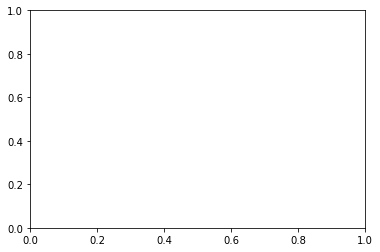

In [3]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmology = FlatLambdaCDM(H0 = 70*u.km/u.s/u.Mpc, Om0 = 0.3)
cosmology.age(0)
import numpy as np

# Redshift is declining when going to the right, seems easier to 
# put things in terms of t_gyr first
#redshifts = np.linspace(0, 10, 100) - I CAUSED ERRORS WITH SHAPES
# redshifts = np.flip(redshifts)
# y_data    = np.random.rand(len(redshifts))
# t_gyr = cosmology.age(redshifts)


fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.suptitle(('$\kapp_{co}$ vs Time' + dataset + ' ' + file), y=0.95, fontsize=20  )

# .value is needed as t_gyr is an object with units
x_min, x_max = np.min(t_gyr.value), np.max(t_gyr.value)

# We're going to start working with ax1, then only bring up
# ax2 once we're happy with how t_gyr is working.
# The plotting code here is a stand-in for your three different lines.
# Just replace the below line with:
#   ax1.plot(cosmology.age(redshifts[0,0:]).value, kco_s[0,0:], linewidth = 1.........), etc
ax1.plot(cosmology.age(redshifts[0,0:]).value,kco_s[0,0:], linewidth=1, color='maroon', label='Early')
ax1.plot(cosmology.age(redshifts[1,0:]).value,kco_s[1,0:], linewidth=1, color='blue', label='Late')
ax1.plot(cosmology.age(redshifts[2,0:]).value,kco_s[2,0:], linewidth=1, color='darkgreen', label='Organic')

ax1.set_ylabel('Kco', rotation = 90)
ax1.set_xlabel('Time in Gyr')

# Now we've plotted our data, lets sort the tick labels

# First, make ax2. Remember, ax2 THINKS it is working in the same units as
# ax1, t_gyr. We will decide which redshift ticks we want, then work backwards
# to find where they will appear in t_gyr space.
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift', rotation = 0)

# Axes need the same limits
ax1.set_xlim([x_min, x_max])
ax2.set_xlim([x_min, x_max])

# Define locations of ticks for ax1
tgyr_xticks = np.array((0, 2, 4, 6, 8, 10, 12))

# Locations and labels of ax1 are the same, so the following
# two lines take the same array as an input
ax1.set_xticks(tgyr_xticks)
ax1.set_xticklabels(tgyr_xticks)

# Define the ticks we want for ax2
z_xticks = np.array((3, 2, 1, 0.5, 0.2, 0))

# Remember ax2 thinks its in units of t_gyr, so we need to convert these
# redshifts to t_gyr. This will set the location of the ticks.
z_xtick_locs = cosmology.age(z_xticks).value

# Draw the ticks in locations determined by the t_gyr-converted array
ax2.set_xticks(z_xtick_locs)

# Now label the ticks using the redshift array 
ax2.set_xticklabels(z_xticks)

ax1.legend()

plt.show()
plt.savefig('C:\\Users\\katha\\GalaxyMorphology\\' + '\\KcovsTimeplot' + '.png', dpi=300)

In [4]:
print(kco_s[0,0:])

[0.15051511 0.31347635 0.26493926 0.15833752 0.2805726  0.15045505
 0.2631594  0.24536294 0.18561104 0.31277698 0.2901415  0.23280049
 0.43756504 0.65225797 0.68856113 0.693217   0.53834201 0.52417425
 0.51172631 0.47291823 0.43422064 0.41657947 0.41876874 0.42621062]


In [5]:
cosmology.age(redshifts).value

array([[ 0.74384012,  0.92269191,  1.0275762 ,  1.1441955 ,  1.32042424,
         1.52326246,  1.7572531 ,  2.09928812,  2.59756909,  2.88684983,
         3.20788129,  3.68698007,  4.23221429,  4.85234366,  5.73581407,
         6.32882428,  6.96881561,  7.66385516,  8.40503794,  9.46613101,
        10.32119201, 11.21638088, 12.15358339, 13.46698395],
       [ 0.74384012,  0.92269191,  1.0275762 ,  1.1441955 ,  1.32042424,
         1.52326246,  1.7572531 ,  2.09928812,  2.59756909,  2.88684983,
         3.20788129,  3.68698007,  4.23221429,  4.85234366,  5.73581407,
         6.32882428,  6.96881561,  7.66385516,  8.40503794,  9.46613101,
        10.32119201, 11.21638088, 12.15358339, 13.46698395],
       [ 0.74384012,  0.92269191,  1.0275762 ,  1.1441955 ,  1.32042424,
         1.52326246,  1.7572531 ,  2.09928812,  2.59756909,  2.88684983,
         3.20788129,  3.68698007,  4.23221429,  4.85234366,  5.73581407,
         6.32882428,  6.96881561,  7.66385516,  8.40503794,  9.46613101,
  

In [6]:
print(redshifts)

[[7.05  5.971 5.487 5.037 4.485 3.984 3.528 3.017 2.478 2.237 2.012 1.737
  1.487 1.259 1.004 0.865 0.736 0.615 0.503 0.366 0.271 0.183 0.101 0.   ]
 [7.05  5.971 5.487 5.037 4.485 3.984 3.528 3.017 2.478 2.237 2.012 1.737
  1.487 1.259 1.004 0.865 0.736 0.615 0.503 0.366 0.271 0.183 0.101 0.   ]
 [7.05  5.971 5.487 5.037 4.485 3.984 3.528 3.017 2.478 2.237 2.012 1.737
  1.487 1.259 1.004 0.865 0.736 0.615 0.503 0.366 0.271 0.183 0.101 0.   ]]


In [7]:
cosmology.age(redshifts[0,0:]).value

array([ 0.74384012,  0.92269191,  1.0275762 ,  1.1441955 ,  1.32042424,
        1.52326246,  1.7572531 ,  2.09928812,  2.59756909,  2.88684983,
        3.20788129,  3.68698007,  4.23221429,  4.85234366,  5.73581407,
        6.32882428,  6.96881561,  7.66385516,  8.40503794,  9.46613101,
       10.32119201, 11.21638088, 12.15358339, 13.46698395])

<Figure size 432x288 with 0 Axes>

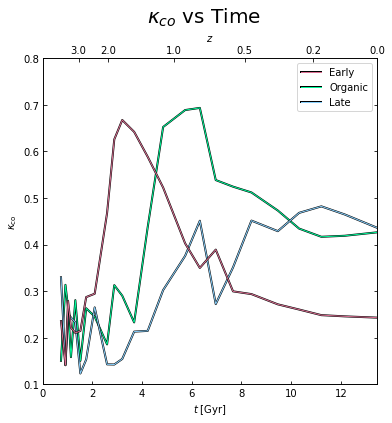

In [24]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmology = FlatLambdaCDM(H0 = 70*u.km/u.s/u.Mpc, Om0 = 0.3)
cosmology.age(0)
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects

# Redshift is declining when going to the right, seems easier to 
# put things in terms of t_gyr first
#redshifts = np.linspace(0, 10, 100) - I CAUSED ERRORS WITH SHAPES
# redshifts = np.flip(redshifts)
# y_data    = np.random.rand(len(redshifts))
t_gyr = cosmology.age(redshifts)


fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
FS = 10

plt.rcParams.update({'font.size': FS})
fig, ax1 = plt.subplots(1,1, figsize = [6,6])


# .value is needed as t_gyr is an object with units
x_min, x_max = np.min(t_gyr.value), np.max(t_gyr.value)

# We're going to start working with ax1, then only bring up
# ax2 once we're happy with how t_gyr is working.
# The plotting code here is a stand-in for your three different lines.
# Just replace the below line with:
#   ax1.plot(cosmology.age(redshifts[0,0:]).value, kco_s[0,0:], linewidth = 1.........), etc
ax1.plot(cosmology.age(redshifts[0,0:]).value,kco_s[0,0:], linewidth=1, color='mediumspringgreen', label='Organic', path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")])
ax1.plot(cosmology.age(redshifts[1,0:]).value,kco_s[1,0:], linewidth=1, color='lightskyblue', label='Late', path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")])
ax1.plot(cosmology.age(redshifts[2,0:]).value,kco_s[2,0:], linewidth=1, color='palevioletred', label='Early', path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")])

ax1.set_ylabel('$\kappa_{\mathrm{co}}$', rotation = 90)
ax1.set_xlabel('$t\;[\mathrm{Gyr}]$')

# Now we've plotted our data, lets sort the tick labels

# First, make ax2. Remember, ax2 THINKS it is working in the same units as
# ax1, t_gyr. We will decide which redshift ticks we want, then work backwards
# to find where they will appear in t_gyr space.
ax2 = ax1.twiny()
ax2.set_xlabel('$z$', rotation = 0)

# Axes need the same limits
ax1.set_xlim([x_min, x_max])
ax2.set_xlim([x_min, x_max])
ax1.set_ylim([0.1, 0.8])
ax2.set_ylim([0.1, 0.8])

# Define locations of ticks for ax1
tgyr_xticks = np.array((0, 2, 4, 6, 8, 10, 12))

# Locations and labels of ax1 are the same, so the following
# two lines take the same array as an input
ax1.set_xticks(tgyr_xticks)
ax1.set_xticklabels(tgyr_xticks)

# Define the ticks we want for ax2
z_xticks = np.array((3, 2, 1, 0.5, 0.2, 0))

# Remember ax2 thinks its in units of t_gyr, so we need to convert these
# redshifts to t_gyr. This will set the location of the ticks.
z_xtick_locs = cosmology.age(z_xticks).value

# Draw the ticks in locations determined by the t_gyr-converted array
ax2.set_xticks(z_xtick_locs)

# Now label the ticks using the redshift array 
ax2.set_xticklabels(z_xticks)

ax1.yaxis.set_ticks_position('both') 
ax1.tick_params(direction= 'in') 
ax2.tick_params(direction= 'in')

custom_lines = [Line2D([0], [0], color= 'palevioletred', ls = '-', lw = 1, path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")]),
                Line2D([1], [0], color= 'mediumspringgreen', ls = '-', lw = 1, path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")]),
                Line2D([2], [0], color= 'lightskyblue', ls = '-', lw = 1, path_effects=[PathEffects.withStroke(linewidth=2,foreground="black")])]

plt.legend(custom_lines, ['Early', 'Organic', 'Late'], fontsize = 10, frameon = True)
plt.suptitle(('$\kappa_{co}$ vs Time'), y=1, fontsize=20  )
# import scipy
# from scipy.signal import find_peaks
# peaks, _ = find_peaks(cosmology.age(redshifts[0,0:]).value)
# scipy.signal.find_peaks(cosmology.age(redshifts[0,0:]).value)
# plt.plot(peaks, cosmology.age(redshifts[0,0:]).value[peaks], "x")

plt.show()
fig.savefig('C:\\Users\\katha\\GalaxyMorphology\\' + '\\KcovsTimeplot' + '.png', dpi=300)